loading annotations into memory...
Done (t=0.95s)
creating index...
index created!


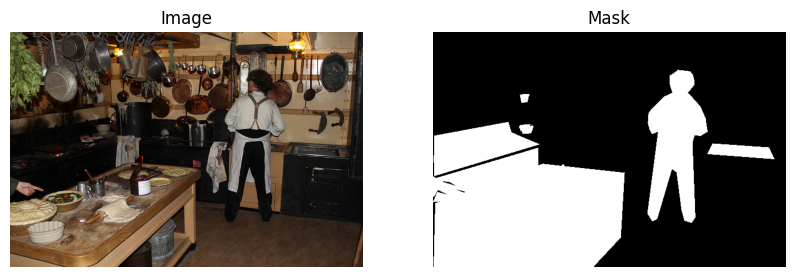

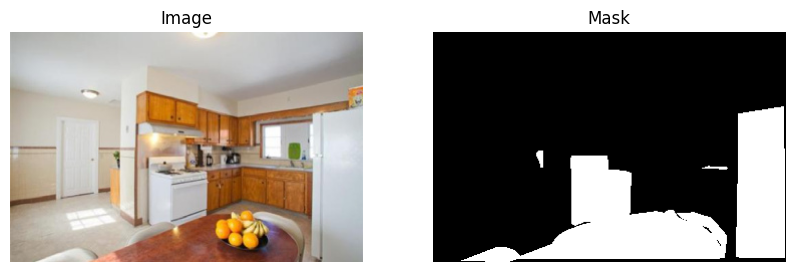

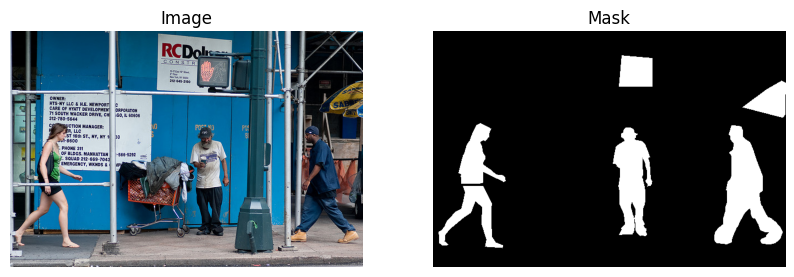

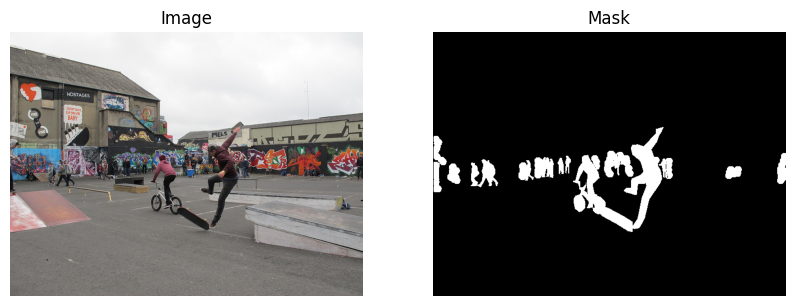

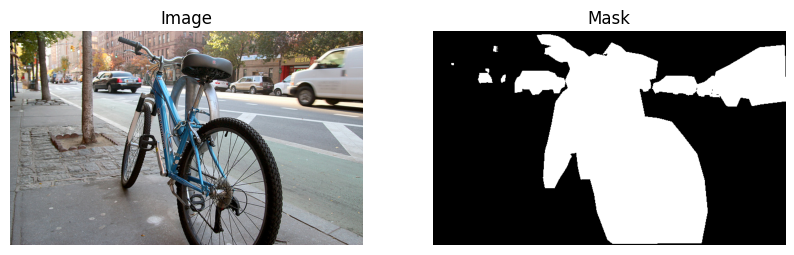

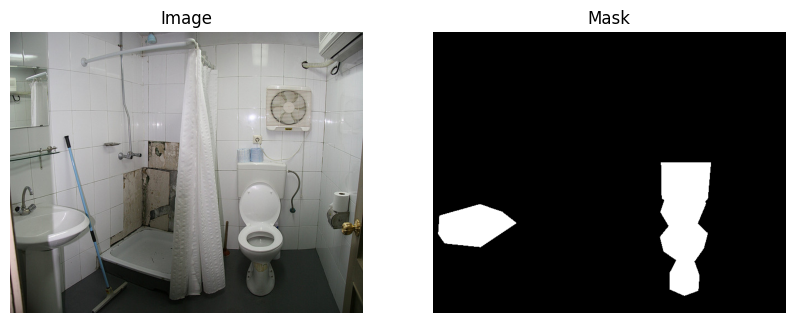

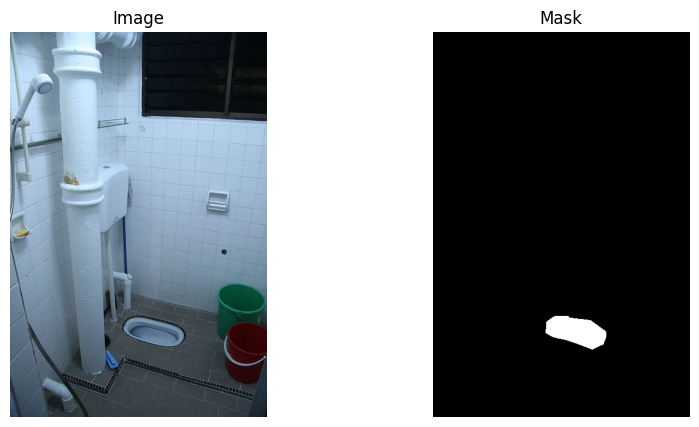

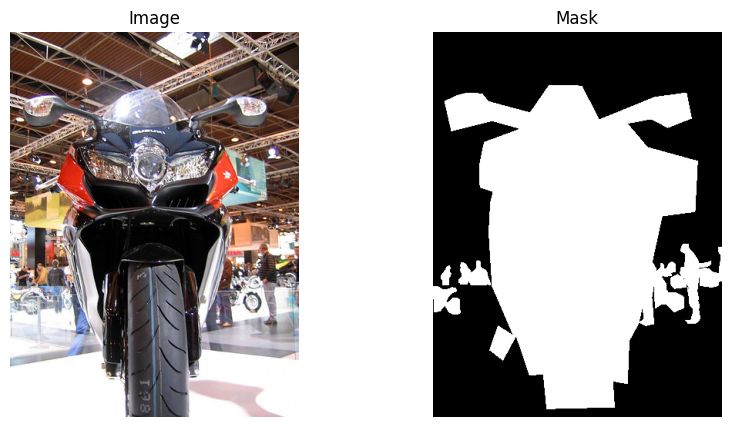

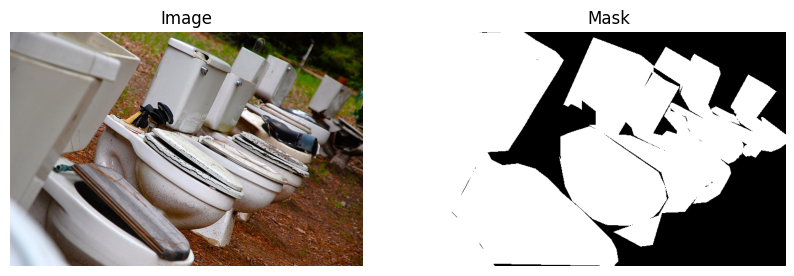

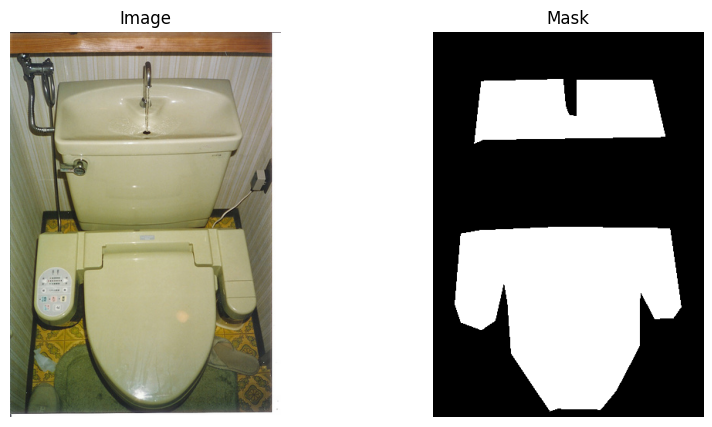

In [1]:
!pip install pycocotools opencv-python matplotlib

# Download validation images
!mkdir -p coco
!wget -q http://images.cocodataset.org/zips/val2017.zip -P coco/
!unzip -q coco/val2017.zip -d coco/

# Download validation annotations
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/
!unzip -q coco/annotations_trainval2017.zip -d coco/

# --- Python code to show first 10 image-mask pairs ---
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

img_dir = "coco/val2017"
ann_file = "coco/annotations/instances_val2017.json"


coco = COCO(ann_file)
img_ids = coco.getImgIds()


sample_ids = img_ids[:10]

for img_id in sample_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])


    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)


    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * 255)


    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img)
    axs[0].set_title("Image")
    axs[0].axis("off")

    axs[1].imshow(mask, cmap="gray")
    axs[1].set_title("Mask")
    axs[1].axis("off")

    plt.show()

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


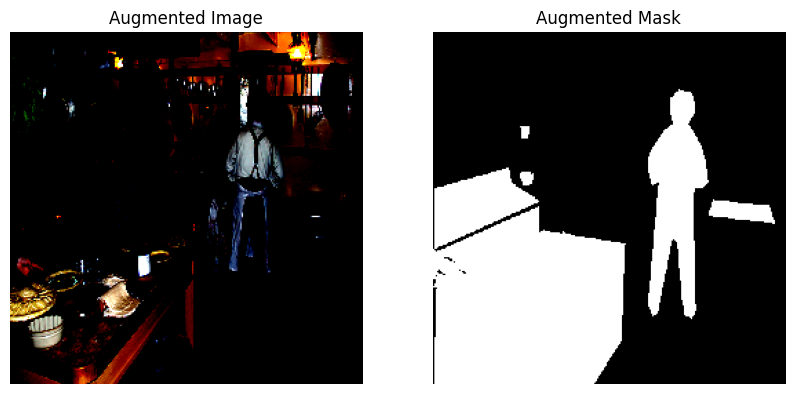

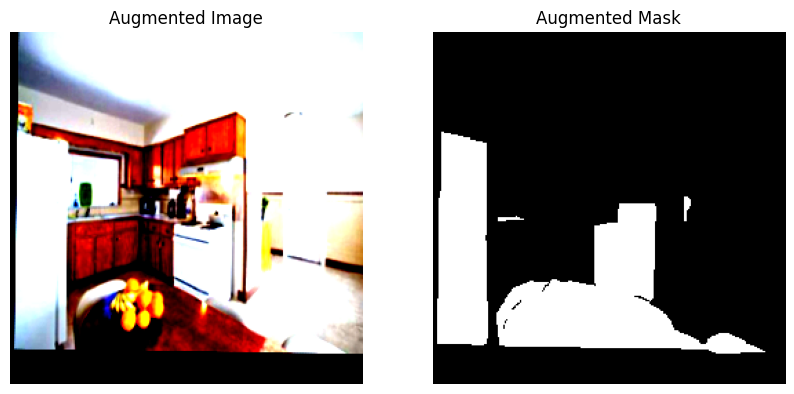

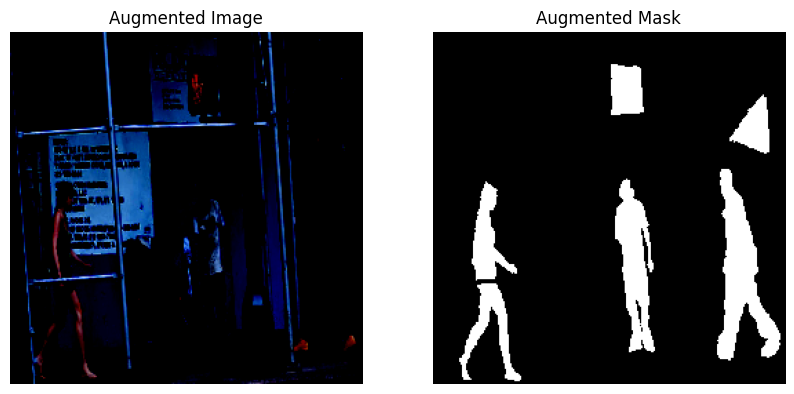

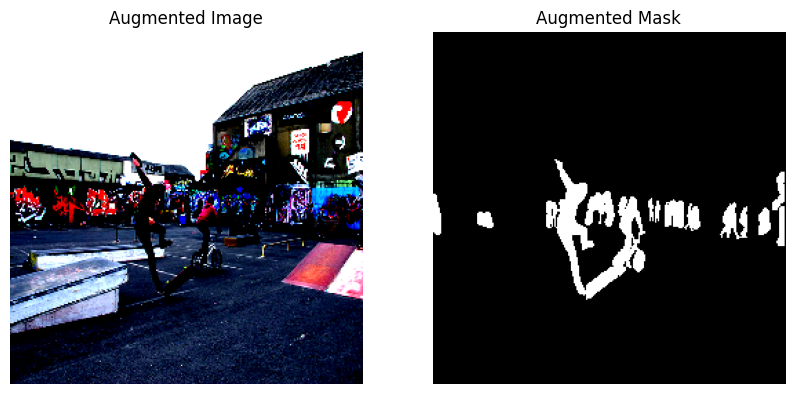

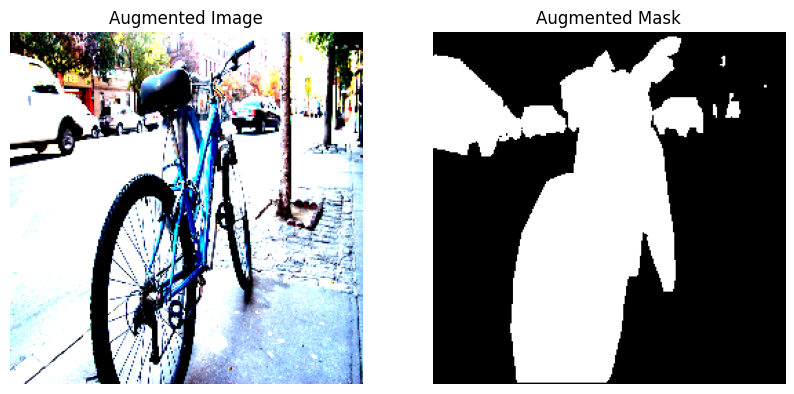

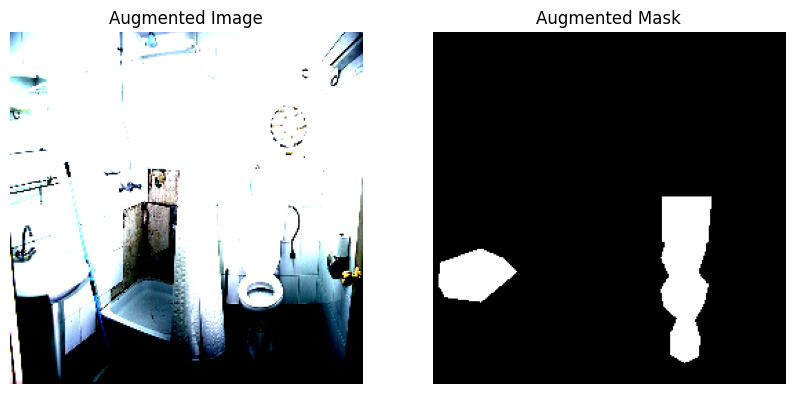

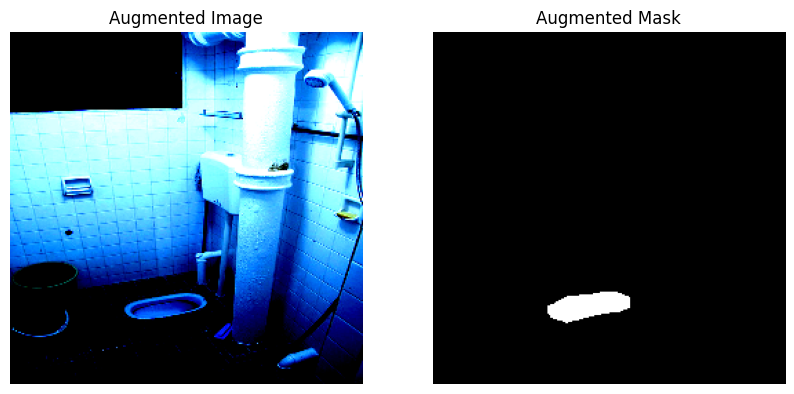

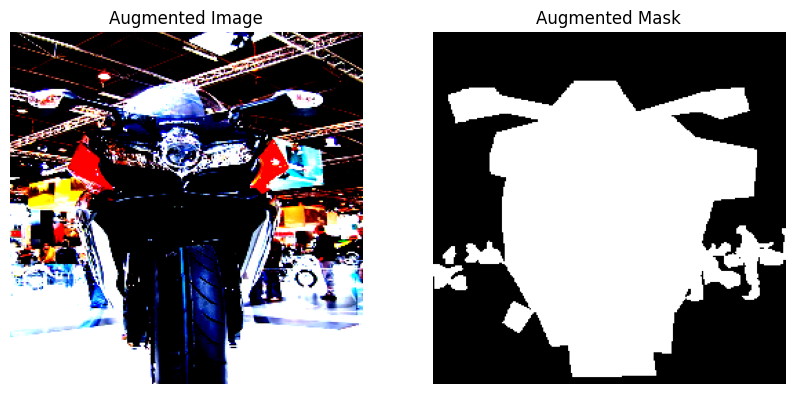

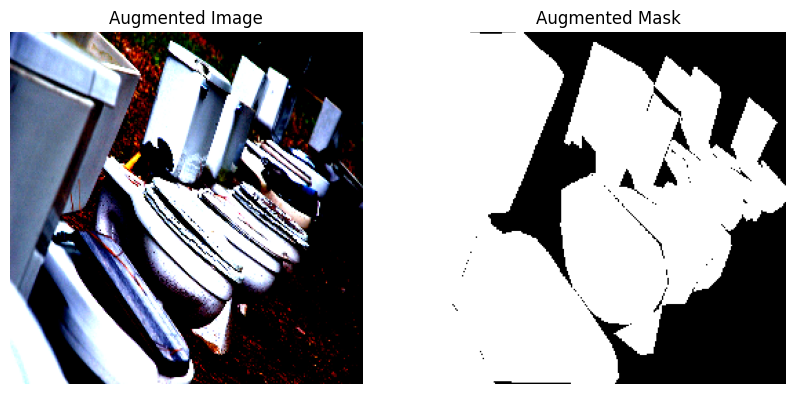

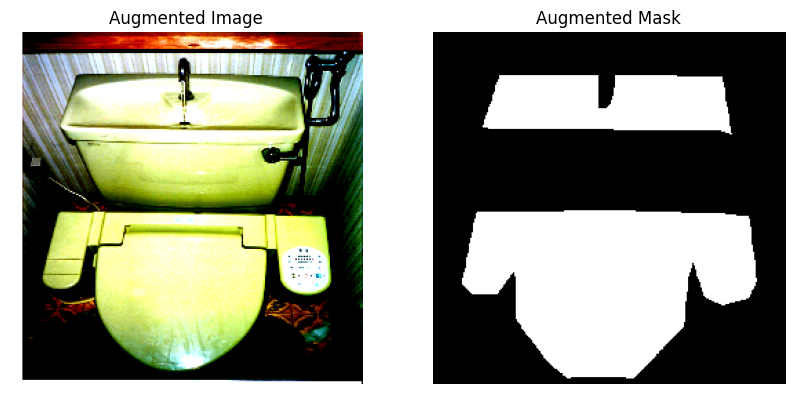

In [4]:
import albumentations as A


img_ids = coco.getImgIds()
sample_ids = img_ids[:10]


transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1,
                       rotate_limit=15, p=0.3),
    A.Normalize(mean=(0.485, 0.456, 0.406),
                std=(0.229, 0.224, 0.225)),
])

for img_id in sample_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_path = os.path.join(img_dir, img_info['file_name'])

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * 255)

    augmented = transform(image=img, mask=mask)
    aug_img, aug_mask = augmented['image'], augmented['mask']

    vis_img = np.clip((aug_img * 255), 0, 255).astype(np.uint8)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(vis_img)
    axs[0].set_title("Augmented Image")
    axs[0].axis("off")

    axs[1].imshow(aug_mask, cmap="gray")
    axs[1].set_title("Augmented Mask")
    axs[1].axis("off")

    plt.show()